# Toronto Real Estate Data Analysis
## Home Index from 2015 to 2020

### Questions which are tackled with this analysis:

1. Most Expensive neighbourhoods for:
    - apartments
    - town house
    - single family detach
    - single family attach
2. Performance of Y/Y percentage on a yearly basis. Is it raising? Is it declining?
3. Distribution od the MLS index among compared to the various types of housing. Which is the best number to look for?

# Business Understanding

In [1]:
#Relevant imports to the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploration

Working with dataset from the following Kaggle source: https://www.kaggle.com/alankmwong/toronto-home-price-index

In [2]:
# Importing the dataset
df = pd.read_csv('./MLS.csv')

# Take a quick look how the data looks with the first 5 rows
df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


In [3]:
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows in our dataset.')

There are 17 columns and 4726 rows in our dataset.


# Data Understanding & Preparation

#### Identifying the total number of missing values

In [4]:
# Try to identify any missing values
df.isna().sum()

Location                0
CompIndex              10
CompBenchmark          10
CompYoYChange          10
SFDetachIndex          10
SFDetachBenchmark      10
SFDetachYoYChange      11
SFAttachIndex         132
SFAttachBenchmark     132
SFAttachYoYChange     130
THouseIndex          1193
THouseBenchmark      1193
THouseYoYChange      1192
ApartIndex           1016
ApartBenchmark       1016
ApartYoYChange       1016
Date                    0
dtype: int64

#### Investigating the summary statistics of the provided dataset

In [5]:
#Summary Statistics of the dataset
df.describe()

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
count,4716.000000,4.716000e+03,4716.000000,4716.000000,4.716000e+03,4715.000000,4594.000000,4.594000e+03,4596.000000,3533.000000,3.533000e+03,3534.000000,3710.000000,3710.000000,3710.000000
mean,240.155301,7.578235e+05,9.892029,241.456701,9.314597e+05,8.757215,242.526643,7.055091e+05,8.698211,240.085168,5.716252e+05,9.198285,232.176307,475095.876011,11.968650
std,38.154687,2.674843e+05,9.105151,38.597944,3.715161e+05,10.339384,39.416617,2.389245e+05,9.964786,52.954460,2.178911e+05,14.858013,51.000733,144286.828179,9.142271
min,135.000000,2.570000e+05,-19.580000,126.000000,2.591000e+05,-21.320000,137.200000,2.733000e+05,-100.000000,0.000000,0.000000e+00,-100.000000,106.000000,171400.000000,-9.510000
25%,214.875000,5.791750e+05,4.060000,217.700000,6.715000e+05,1.830000,218.025000,5.347250e+05,2.330000,207.200000,4.317000e+05,3.830000,191.825000,372050.000000,5.952500
50%,244.200000,7.120500e+05,9.130000,244.050000,8.554500e+05,7.910000,243.900000,6.613000e+05,8.150000,242.600000,5.466000e+05,9.300000,235.400000,466950.000000,10.105000
75%,264.500000,8.875750e+05,15.002500,265.600000,1.117300e+06,14.795000,264.600000,8.198000e+05,14.700000,273.000000,6.587000e+05,15.470000,266.775000,559375.000000,15.890000
max,388.500000,2.110000e+06,46.780000,385.400000,2.536900e+06,46.450000,709.000000,1.561300e+06,39.740000,437.600000,1.750500e+06,56.490000,388.100000,973400.000000,64.320000


#### Imputing the missing values by using the mode() function (see more here: https://www.geeksforgeeks.org/python-statistics-mode-function/ )

In [6]:
fill_mode = lambda col: col.fillna(col.mode()[0])

df.apply(fill_mode, axis=0)

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-11-01
5,Adjala-Tosorontio,150.3,533400.0,17.51,150.3,533400.0,17.51,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2015-12-01
6,Adjala-Tosorontio,152.1,539800.0,22.96,152.1,539800.0,22.96,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2016-01-01
7,Adjala-Tosorontio,146.1,518500.0,13.52,146.1,518500.0,13.52,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2016-02-01
8,Adjala-Tosorontio,148.9,528400.0,8.77,148.9,528400.0,8.77,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2016-03-01
9,Adjala-Tosorontio,153.6,545100.0,11.79,153.6,545100.0,11.79,256.6,628700.0,0.08,0.0,0.0,-100.00,230.6,465100.0,10.21,2016-04-01


#### Investigating the correlation between the provided numeric values

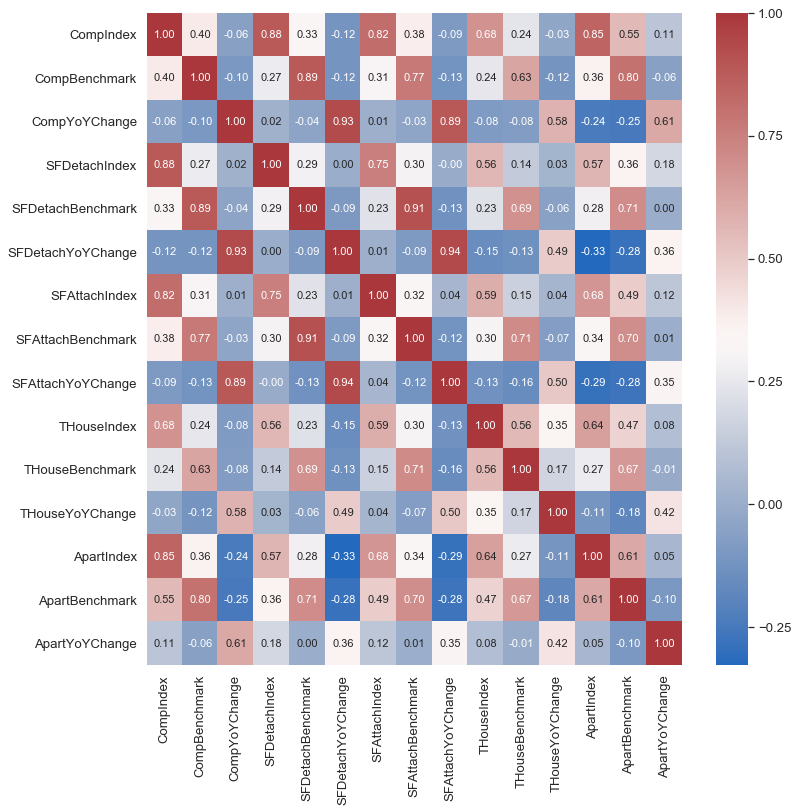

In [7]:
# Heatmap which shows the correlation between the various numeric variables
plt.rcParams["figure.figsize"] = (12, 12)
sns.set(font_scale=1.2)
sns_plot = sns.heatmap(df.corr(), cmap='vlag',  annot=True, fmt='.2f', annot_kws={"size": 11})
sns_plot.figure.savefig("Corr_Plot.jpg", bbox_inches='tight')

# Key Business Questions Imposed
# 1. Identifying the 5 most expensive neighborhoods

In [19]:
df = df.replace(np.nan, 0, regex=True)
df['CompBenchmark'] = df['CompBenchmark'].astype(int)
df['SFAttachBenchmark'] = df['SFAttachBenchmark'].astype(int)
df['SFDetachBenchmark'] = df['SFDetachBenchmark'].astype(int)
df['THouseBenchmark'] = df['THouseBenchmark'].astype(int)
df['ApartBenchmark'] = df['ApartBenchmark'].astype(int)
df['SFDetachYoYChange'] = df['SFDetachYoYChange'].astype(int)
df['SFAttachYoYChange'] = df['SFAttachYoYChange'].astype(int)

In [20]:
# Group by max benchmark price per location
top_Comp = df[['Location', 'CompBenchmark']].groupby('Location').max().reset_index().sort_values('CompBenchmark', ascending=False).head(5)
top_Apart = df[['Location', 'ApartBenchmark']].groupby('Location').max().reset_index().sort_values('ApartBenchmark', ascending=False).head(5)
top_THouse = df[['Location', 'THouseBenchmark']].groupby('Location').max().reset_index().sort_values('THouseBenchmark', ascending=False).head(5)
top_SA = df[['Location', 'SFAttachBenchmark']].groupby('Location').max().reset_index().sort_values('SFAttachBenchmark', ascending=False).head(5)
top_SD = df[['Location', 'SFDetachBenchmark']].groupby('Location').max().reset_index().sort_values('SFDetachBenchmark', ascending=False).head(5)

## Apartments/Condominiums

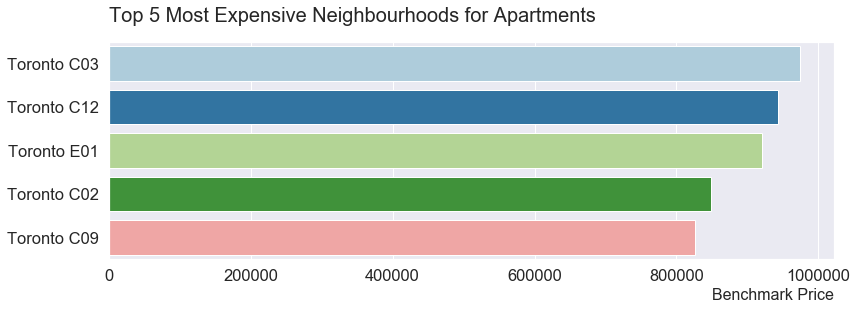

In [21]:
# plot barplot
sns.set(font_scale = 1.5)
palette = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(13,4))
ax = sns.barplot(x='ApartBenchmark', y='Location', data=top_Apart, palette=palette)
plt.xlabel('Benchmark Price', fontsize=16, horizontalalignment='right', position = (1,25))
plt.ylabel('', fontsize=16)
plt.title('Top 5 Most Expensive Neighbourhoods for Apartments', fontsize=20, loc='left', pad=20)

plt.savefig('top5_App.jpg',bbox_inches='tight')

## Single Detached Family House

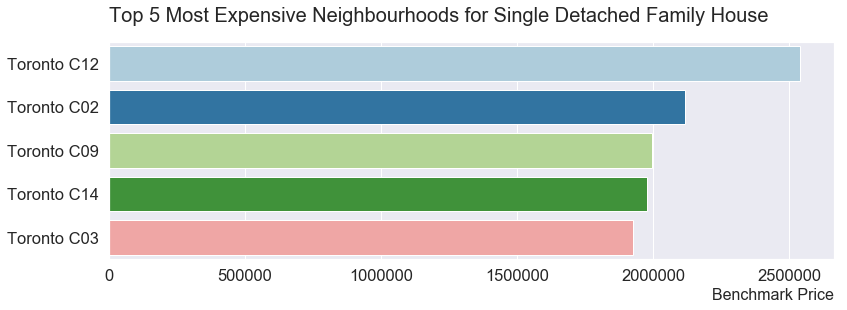

In [22]:
# plot barplot
sns.set(font_scale = 1.5)
palette = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(13,4))
ax = sns.barplot(x='SFDetachBenchmark', y='Location', data=top_SD, palette=palette)
plt.xlabel('Benchmark Price', fontsize=16, horizontalalignment='right', position = (1,25))
plt.ylabel('', fontsize=16)
plt.title('Top 5 Most Expensive Neighbourhoods for Single Detached Family House', fontsize=20, loc='left', pad=20)

plt.savefig('top5_SD.jpg',bbox_inches='tight')

## Single Attached Family House

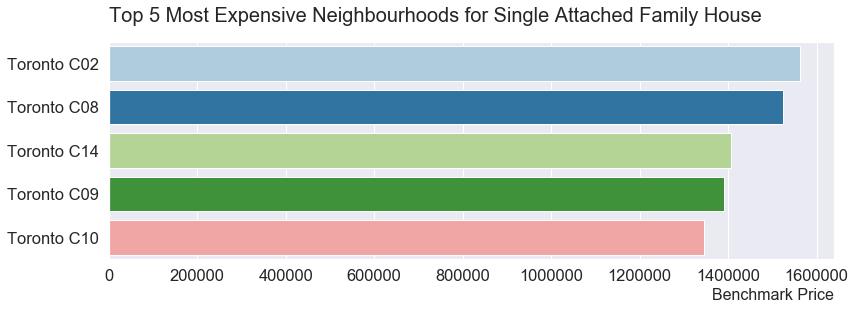

In [23]:
# plot barplot
sns.set(font_scale = 1.5)
palette = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(13,4))
ax = sns.barplot(x='SFAttachBenchmark', y='Location', data=top_SA, palette=palette)
plt.xlabel('Benchmark Price', fontsize=16, horizontalalignment='right', position = (1,25))
plt.ylabel('', fontsize=16)
plt.title('Top 5 Most Expensive Neighbourhoods for Single Attached Family House', fontsize=20, loc='left', pad=20)

plt.savefig('top5_SA.jpg',bbox_inches='tight')

## Town house

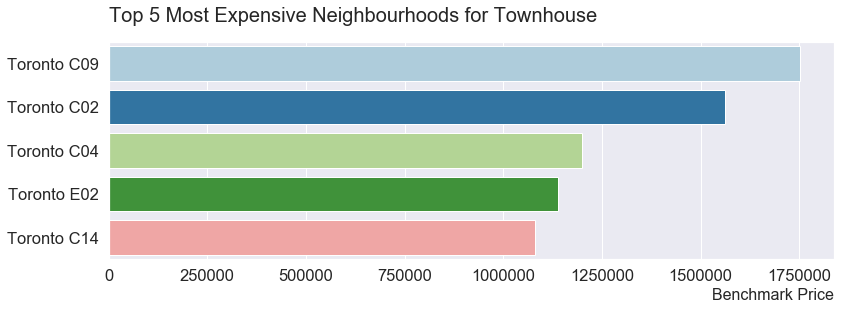

In [24]:
# plot barplot
sns.set(font_scale = 1.5)
palette = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(13,4))
ax = sns.barplot(x='THouseBenchmark', y='Location', data=top_THouse, palette=palette)
plt.xlabel('Benchmark Price', fontsize=16, horizontalalignment='right', position = (1,25))
plt.ylabel('', fontsize=16)
plt.title('Top 5 Most Expensive Neighbourhoods for Townhouse', fontsize=20, loc='left', pad=20)

plt.savefig('top5_TH.jpg',bbox_inches='tight')

# 2. Is the year to year change in percentage trend raising or declining? How to use that trend to make a tactical decision on when to buy your home.

####  Prepare and group the data by year

In [21]:
# Useful functions
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

def group_by_year_INT(data):
    new_data = data.groupby([df['Date'].dt.year]).mean()
    return new_data.astype(int)

In [20]:
change_Comp = group_by_year(df[['Date', 'CompYoYChange']])
change_App = group_by_year(df[['Date', 'ApartYoYChange']])
change_THouse = group_by_year(df[['Date', 'THouseYoYChange']])
change_SD = group_by_year(df[['Date', 'SFDetachYoYChange']])
change_SA = group_by_year(df[['Date', 'SFAttachYoYChange']])


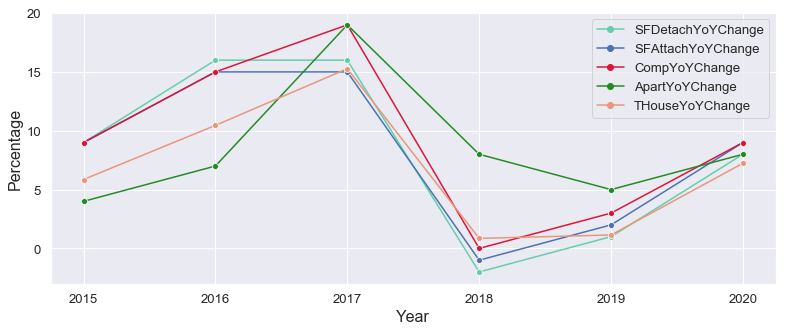

In [52]:
# Configuring the look of the plot
sns.set_style("dark", {'axes.grid' : True})
sns.set(font_scale = 1.2)
palette = sns.color_palette("Paired")
# Defining the size of the plot
fig, axs = plt.subplots(figsize=(13,5))
# five line plots for each of the trends for different households
ax = sns.lineplot(data=change_SD,  markers=True, palette=['mediumaquamarine'])
ax2 = sns.lineplot(data=change_SA,  markers=True)
ax3 = sns.lineplot(data=change_Comp,  markers=True, palette=['crimson'])
ax4 = sns.lineplot(data=change_App,  markers=True, palette=['forestgreen'])
ax5 = sns.lineplot(data=change_THouse,  markers=True, palette=['darksalmon'])
plt.ylabel('Percentage', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.savefig('YearToYear.jpg',bbox_inches='tight')

# 3. Distribution od the MLS index among compared to the various types of housing. Which is the best number to look for?

## Composite vs. Apartment

C:\Users\Installers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


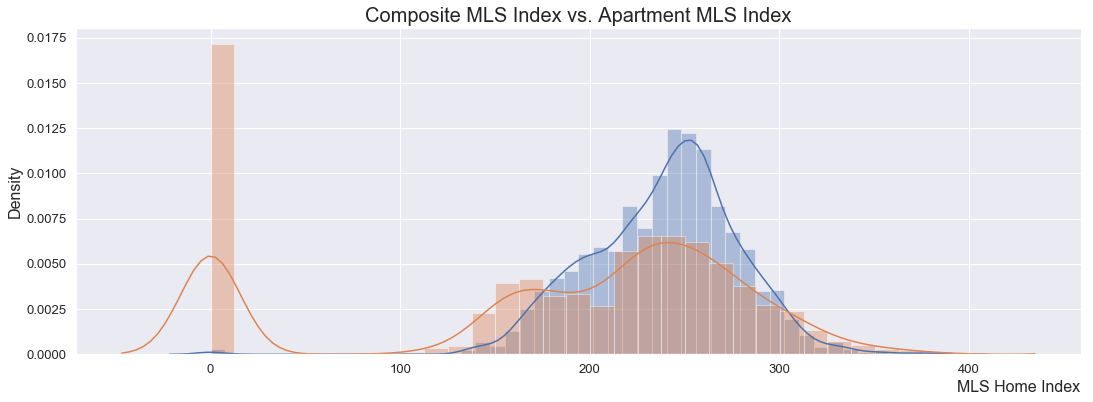

In [53]:
sns.set_style("dark", {'axes.grid' : True})
sns.set(font_scale = 1.2)
palette = sns.color_palette("Paired")
fig, axs = plt.subplots(figsize=(18,6))
ax = sns.distplot(df['CompIndex'])
ax2 = sns.distplot(df['ApartIndex'])
plt.xlabel('MLS Home Index', fontsize=16, horizontalalignment='right', position = (1,25))
plt.ylabel('Density', fontsize=16)
plt.title('Composite MLS Index vs. Apartment MLS Index', size = 20)
plt.savefig('CompApart.jpg',bbox_inches='tight')

## Composite vs. Town House

C:\Users\Installers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


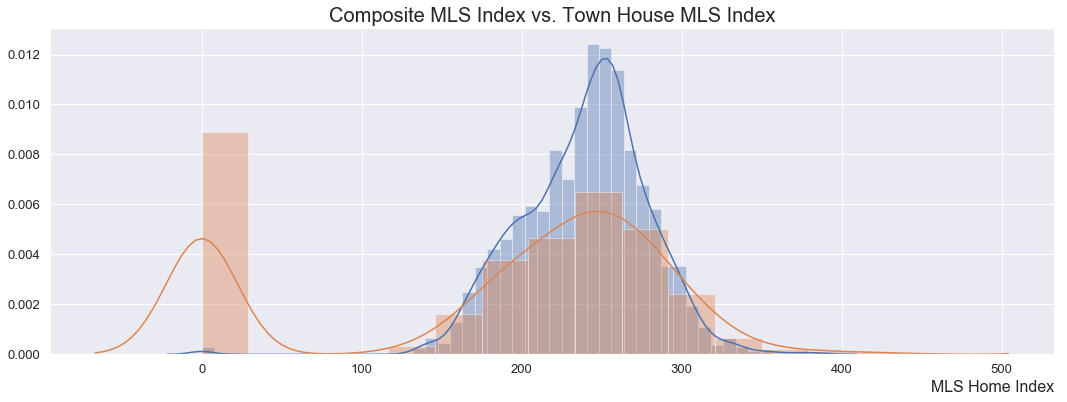

In [54]:
sns.set_style("dark", {'axes.grid' : True})
sns.set(font_scale = 1.2)
palette = sns.color_palette("Paired")
fig, axs = plt.subplots(figsize=(18,6))
ax = sns.distplot(df['CompIndex'])
ax2 = sns.distplot(df['THouseIndex'])
plt.xlabel('MLS Home Index', fontsize=16, horizontalalignment='right', position = (1,25))
plt.title('Composite MLS Index vs. Town House MLS Index', size = 20)
plt.savefig('CompTHouse.jpg',bbox_inches='tight')

## Composite vs. Single Family Detached 

C:\Users\Installers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


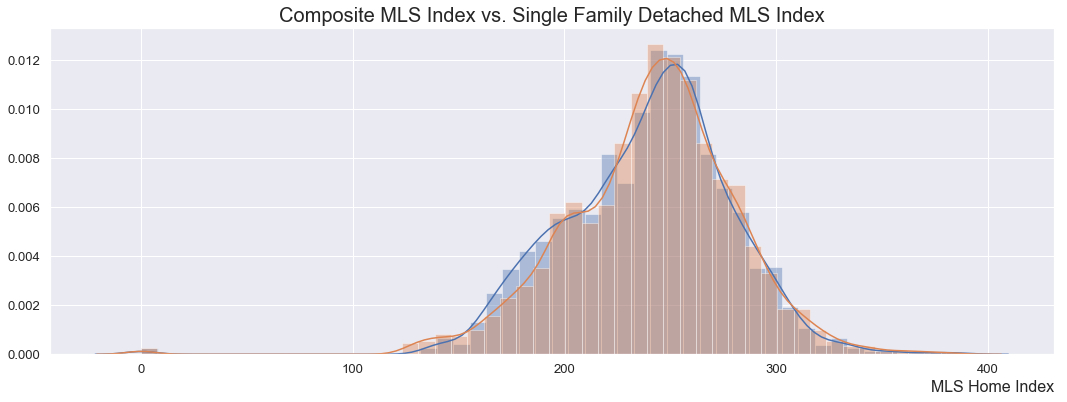

In [55]:
sns.set_style("dark", {'axes.grid' : True})
sns.set(font_scale = 1.2)
palette = sns.color_palette("Paired")
fig, axs = plt.subplots(figsize=(18,6))
ax = sns.distplot(df['CompIndex'])
ax2 = sns.distplot(df['SFDetachIndex'])
plt.xlabel('MLS Home Index', fontsize=16, horizontalalignment='right', position = (1,25))
plt.title('Composite MLS Index vs. Single Family Detached MLS Index', size = 20)
plt.savefig('CompSFDetach.jpg',bbox_inches='tight')

## Composite vs. Single Family Attached

C:\Users\Installers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


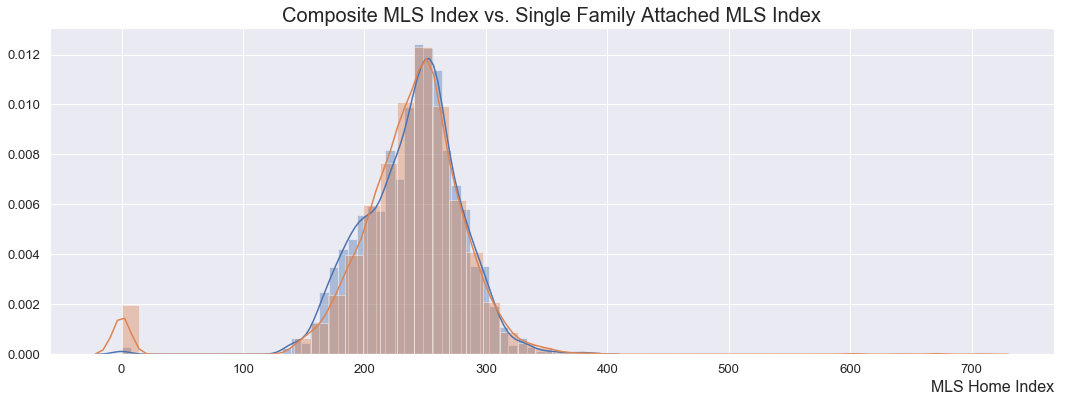

In [56]:
sns.set_style("dark", {'axes.grid' : True})
sns.set(font_scale = 1.2)
palette = sns.color_palette("Paired")
fig, axs = plt.subplots(figsize=(18,6))
ax = sns.distplot(df['CompIndex'])
ax2 = sns.distplot(df['SFAttachIndex'])
plt.xlabel('MLS Home Index', fontsize=16, horizontalalignment='right', position = (1,25))
plt.title('Composite MLS Index vs. Single Family Attached MLS Index', size = 20)
plt.savefig('SFAttach.jpg',bbox_inches='tight')